In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization 
import cv2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from tensorflow.keras.models import model_from_json

In [ ]:
!unzip '/content/drive/MyDrive/face emotions dataset.zip' -d '/content'

Streaming output truncated to the last 5000 lines.
 extracting: /content/face emotions dataset/validation/angry/Training_81885304.jpg  
 extracting: /content/face emotions dataset/validation/angry/Training_81898650.jpg  
 extracting: /content/face emotions dataset/validation/angry/Training_81918581.jpg  
 extracting: /content/face emotions dataset/validation/angry/Training_81993292.jpg  
 extracting: /content/face emotions dataset/validation/angry/Training_82035674.jpg  
 extracting: /content/face emotions dataset/validation/angry/Training_82037343.jpg  
 extracting: /content/face emotions dataset/validation/angry/Training_82073038.jpg  
 extracting: /content/face emotions dataset/validation/angry/Training_82090617.jpg  
 extracting: /content/face emotions dataset/validation/angry/Training_82094076.jpg  
 extracting: /content/face emotions dataset/validation/angry/Training_82096123.jpg  
 extracting: /content/face emotions dataset/validation/angry/Training_82152293.jpg  
 extracting: /

In [ ]:
PATH = '/content/face emotions dataset'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (48, 48)

def prep_fn(img):
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return image_rgb


train_gen = ImageDataGenerator(width_shift_range = 0.1,
                                height_shift_range = 0.1,
                                horizontal_flip = True,
                                rescale = 1./255,
                                preprocessing_function = prep_fn
                                )
validation_gen = ImageDataGenerator(rescale = 1./255,
                                    preprocessing_function = prep_fn)


training_data = train_gen.flow_from_directory(train_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=BATCH_SIZE,
                                             color_mode = "rgb",
                                             class_mode = "categorical")


Found 20196 images belonging to 6 classes.


In [ ]:
valid_data = validation_gen.flow_from_directory(validation_dir,
                                                target_size=IMG_SIZE,
                                                batch_size=BATCH_SIZE,
                                                color_mode='rgb',
                                                class_mode='categorical')


Found 5049 images belonging to 6 classes.


In [ ]:
model =tf.keras.Sequential([
     # input layer 
     tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape=(48,48,3),padding='same'),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.ReLU(),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Dropout(0.25),

      tf.keras.layers.Conv2D(128,(4,4), padding='same', activation='relu'),
       tf.keras.layers.BatchNormalization(),
      tf.keras.layers.ReLU(),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Dropout(0.3),
      
      tf.keras.layers.Conv2D(256,(3,3), padding='same', activation='relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.ReLU(),
      tf.keras.layers.Dropout(0.21),
      
      tf.keras.layers.Conv2D(512,(3,3), padding='same', activation='relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.ReLU(),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Dropout(0.15),

       tf.keras.layers.Conv2D(256,(1,1), padding='same', activation='relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.ReLU(),
       
      #   tf.keras.layers.Conv2D(256,(3,3), padding='same', activation='relu'),
      # tf.keras.layers.BatchNormalization(),
      # tf.keras.layers.ReLU(),

      #  tf.keras.layers.Conv2D(64,(3,3), padding='same', activation='relu'),
      # tf.keras.layers.BatchNormalization(),
      # tf.keras.layers.ReLU(),
      
      #  tf.keras.layers.Conv2D(128,(3,3), padding='same', activation='relu'),
      # tf.keras.layers.BatchNormalization(),
      # tf.keras.layers.ReLU(),

      #  tf.keras.layers.Conv2D(64,(3,3), padding='same', activation='relu'),
      # tf.keras.layers.BatchNormalization(),
      # tf.keras.layers.ReLU(),

       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
        
       tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
       
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),

       tf.keras.layers.Dense(6, activation='softmax')

])

In [ ]:
# model = tf.keras.Sequential([

#         # input layer
#         tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape=(48,48,1)),
#         tf.keras.layers.Conv2D(64,(3,3), padding='same', activation='relu' ),
#         tf.keras.layers.BatchNormalization(),
#         # tf.keras.layers.MaxPooling2D(2,2),

#         tf.keras.layers.Dropout(0.25),

#         # 1st hidden dense layer
#         tf.keras.layers.Conv2D(128,(5,5), padding='same', activation='relu'),
#         tf.keras.layers.BatchNormalization(),
#         # tf.keras.layers.MaxPooling2D(2,2),
#         tf.keras.layers.Dropout(0.25),
    
#         # 2nd hidden dense layer
#         tf.keras.layers.Conv2D(512,(3,3), padding='same', activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.MaxPooling2D(2,2),
#         tf.keras.layers.Dropout(0.25),
    
#         # 3rd hidden dense layer
#         tf.keras.layers.Conv2D(512,(3,3), padding='same', activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.MaxPooling2D(2,2),
#         tf.keras.layers.Dropout(0.25),
    
#         # Flatten layer
#         tf.keras.layers.Flatten(),
#         tf.keras.layers.Dense(1024, activation='relu'),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.Dropout(0.25),

#         tf.keras.layers.Dense(256, activation='relu'),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.Dropout(0.25),
    
#         tf.keras.layers.Dense(512, activation='relu'),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.Dropout(0.25),
#         # output layer
#         tf.keras.layers.Dense(6, activation='softmax')
#     ])

In [ ]:
optimiser = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimiser,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       6

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
epochs = 100

In [ ]:
history = model.fit(x = training_data, epochs = epochs, validation_data = valid_data)

Epoch 1/100
632/632 [==============================] - 29s 45ms/step - loss: 2.3825 - accuracy: 0.1866 - val_loss: 1.8608 - val_accuracy: 0.1889
Epoch 2/100
632/632 [==============================] - 28s 44ms/step - loss: 2.1156 - accuracy: 0.2029 - val_loss: 1.8173 - val_accuracy: 0.2050
Epoch 3/100
632/632 [==============================] - 29s 45ms/step - loss: 2.0004 - accuracy: 0.2057 - val_loss: 1.7741 - val_accuracy: 0.2238
Epoch 4/100
632/632 [==============================] - 28s 44ms/step - loss: 1.9225 - accuracy: 0.2230 - val_loss: 1.7873 - val_accuracy: 0.2206
Epoch 5/100
632/632 [==============================] - 28s 45ms/step - loss: 1.8711 - accuracy: 0.2290 - val_loss: 1.7944 - val_accuracy: 0.2123
Epoch 6/100
632/632 [==============================] - 28s 44ms/step - loss: 1.8462 - accuracy: 0.2385 - val_loss: 1.7561 - val_accuracy: 0.2349
Epoch 7/100
632/632 [==============================] - 28s 44ms/step - loss: 1.8092 - accuracy: 0.2486 - val_loss: 1.7164 - val_ac

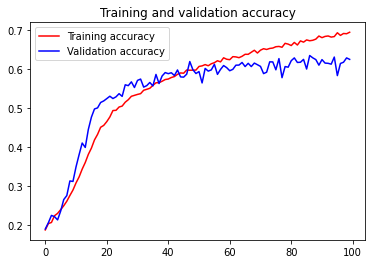

<Figure size 432x288 with 0 Axes>

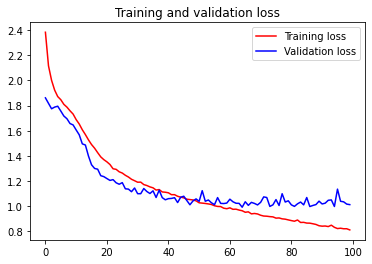

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()



plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/face_emotions.h5')

In [ ]:
train_loss, train_acc = model.evaluate(training_data)
test_loss, test_acc   = model.evaluate(valid_data)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

158/158 [==============================] - 2s 13ms/step - loss: 1.0120 - accuracy: 0.6239
final train accuracy = 77.90 , validation accuracy = 62.39


In [ ]:
model.save_weights('/content/drive/MyDrive/face_emotions_weights.h5')

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
# load json and create model
json_file = open('/content/drive/MyDrive/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)